In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
X =np.array([[-3.6, 1.8, -7.2, -9.6, 0.5, -0.9, -2.1, -2.8, -3.2, -2.2, 1.3, -3.6, -6.3, -0.9, -2.4, 5.2],
[7.8, -7.5, -0.6, 4.5, 0.9, 0, -7, -6.8, -6.4, -9.3, -5.9, -2.5, -7.9, -6.1, 8.6, 5.4]])

In [4]:
Y= np.array([[1], [-1], [1], [1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [1],[1]])

In [61]:
np.array([[1.06],[1.82],[1.2 ]]).T @ np.array([[-2.4], [8.6], [-1]])

array([[11.908]])

W vector 1st Estimate
[[-0.26]
 [ 0.94]
 [ 1.  ]]
W vector 2nd Estimate
[[-1.54]
 [ 2.7 ]
 [ 2.  ]]


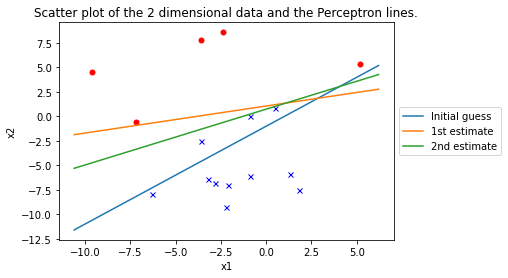

In [17]:
N = len(Y)
dim = len(X[:,1])
theta=1
theta_1= 2
w=np.array([1, -1, theta])
w.shape=(len(w),1)
w_1=np.array([0, 3, theta_1])
w_1.shape=(len(w_1),1)
## learning rate:
eta=0.2


fig1=plt.figure(1); plt.clf()
sym=['x' if Y[i]<0 else 'o' for i in range(0,16)]
col = ['b' if Y[i] < 0 else "r" for i in range(0,16)]   
for i in range(0,16):
    plt.plot(X[0,i],X[1,i],col[i]+sym[i],zorder=1,markersize=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of the 2 dimensional data and the Perceptron lines.")

## plot initial separation line:
x=np.array([min(X[0,:])-1,max(X[0,:])+1]); 
hl,=plt.plot(x,(-x*w[0]+theta)/w[1],'-', label = "Initial guess")

for i in range(0,N):
    XX=X[:,i].T;XX.shape=(dim,1);XX=np.vstack([XX,-1])
    Y_p = w.T @ XX
    if (np.sign(Y_p) != np.sign(Y[i])) | (np.sign(Y_p)==0):
        w = w+eta*Y[i]*XX
        
    
print("W vector 1st Estimate"); print(w)

## plot 1st estimate of separation line:
h2, = plt.plot(x, (-x*w[0]+theta)/w[1], '-', label = "1st estimate")

for i in range(0,N):
    XX=X[:,i].T;XX.shape=(dim,1);XX=np.vstack([XX,-1])
    Y_p = w_1.T @ XX
    if (np.sign(Y_p) != np.sign(Y[i])) | (np.sign(Y_p)==0):
        w_1 = w_1+eta*Y[i]*XX

print("W vector 2nd Estimate"); print(w_1)
h3, = plt.plot(x, (-x*w_1[0]+theta_1)/w_1[1], '-', label = "2nd estimate")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [20]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x[:]))
def tansig(x):
    return 2/(1+np.exp(-2.0*x))-1
def rectlin(x):
    out=np.asarray(x); out[out<0]=0
    return out


In [22]:

w2=np.array([[-0.31314, 0.38796 ],
[-0.60718, 0.67412 ],
[ 2.8908, -1.5217 ]])
b2=np.array([[ 0.81989 ],
[ 0.81574 ],
[ 3.674 ]])
w3=np.array([[ -1.007, -1.7446, 5.1881 ],
[ 16.877, -7.3917, -4.1027 ],
[ 50.772, -21.437, -38.171 ]])
b3=np.array([[-15.236 ],
[-1.8673 ],
[ 20.628 ]])
w4=np.array([ 1.812, 44.299, -35.869 ])
b4=np.array([ 5.2558 ])

def neural_network(X):
    X1 = w2 @ X + b2
    Z1 = sigmoid(X1)
    X2 = w3 @ Z1 + b3
    Z2 = sigmoid(X2)
    X3 = w4@Z2 + b4
    out = rectlin(X3)
    return out


In [70]:
rectlin(w4 @ sigmoid(w3 @ sigmoid(w2 @ np.array([[1.8], [1.1]]) + b2) + b3) + b4)

array([0.67313263])

In [85]:
np.random.seed(42)
inputs =  np.random.uniform(low=1.0, high=2.0, size=(2,20))
inputs.shape = (2,20)
print("10 randomly generated 2d inputs in range(1,2):");print(inputs)
outputs = neural_network(inputs) #Running the innputs through neural network to get the outputs
outputs.shape = (1,20)
print("Outputs :"); print(outputs)

10 randomly generated 2d inputs in range(1,2):
[[1.37454012 1.95071431 1.73199394 1.59865848 1.15601864 1.15599452
  1.05808361 1.86617615 1.60111501 1.70807258 1.02058449 1.96990985
  1.83244264 1.21233911 1.18182497 1.18340451 1.30424224 1.52475643
  1.43194502 1.29122914]
 [1.61185289 1.13949386 1.29214465 1.36636184 1.45606998 1.78517596
  1.19967378 1.51423444 1.59241457 1.04645041 1.60754485 1.17052412
  1.06505159 1.94888554 1.96563203 1.80839735 1.30461377 1.09767211
  1.68423303 1.44015249]]
Outputs :
[[1.89161557 0.66617798 0.96508952 1.16902702 1.83542893 2.75867099
  1.36180046 1.2298549  1.58498492 0.64209008 2.53344166 0.69605509
  0.61993324 3.13446683 3.27092933 2.76527486 1.3065306  0.79128608
  1.98249319 1.60773374]]


In [84]:
neural_network(np.array([[-0.5], [3.5]]))

array([13.59347321])